# Data analysis of the sensitivity analysis

In [1]:
import pandas as pd
from os.path import join
import numpy as np
import os
from scseirx import analysis_functions as af
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
observables_of_interest = ['infected_agents', 'R0']


school_configs = [
    ('primary', 8, 19),
    ('primary_dc', 8, 19),
    ('lower_secondary', 8, 18),
    ('lower_secondary_dc', 8, 18),
    ('upper_secondary', 10, 23),
    ('secondary', 28, 24),
    ]

school_types = ['primary', 'primary_dc', 'lower_secondary', 'lower_secondary_dc',
                'upper_secondary', 'secondary']

stype_names = {'primary':'primary', 'primary_dc':'primary\nwith daycare',
               'lower_secondary':'lower\nsecondary',
               'lower_secondary_dc':'lower\nsecondary\nwith daycare',
               'upper_secondary':'upper\nsecondary', 'secondary':'secondary',
               'secondary_dc':'secondary\nwith daycare'}

## Load data

### Read baseline data

In [3]:
res_path = '../../data/intervention_measures/simulation_results' 

baseline_data = pd.DataFrame()

for stype in school_types:
    tmp = pd.read_csv(join(res_path, '{}_observables.csv'.format(stype)))
    tmp['school_type'] = stype
    baseline_data = pd.concat([baseline_data, tmp])
    

baseline_data['AG_test_sensitivity'] = 1.0
baseline_data['student_test_rate'] = 1.0
baseline_data['teacher_test_rate'] = 1.0
baseline_data['mask_efficiency_inhale'] = 0.7
baseline_data['mask_efficiency_exhale'] = 0.5
baseline_data['transmission_risk_modifier'] = 1.0
baseline_data['class_size_reduction'] = 0
baseline_data.loc[baseline_data[baseline_data['half_classes'] == True].index,
                  'class_size_reduction'] = 0.5

baseline_data = baseline_data.drop(columns=['Unnamed: 0'])
baseline_data = baseline_data.reset_index(drop=True)
baseline_data['student_screen_interval'] = baseline_data['student_screen_interval']\
    .replace({np.nan:'never'})
baseline_data['teacher_screen_interval'] = baseline_data['teacher_screen_interval']\
    .replace({np.nan:'never'})

### Read increased transmission risk data

In [4]:
res_path = '../../data/sensitivity_analysis/simulation_results/transmissibility' 

trisk_data = pd.DataFrame()

for stype, N_classes, class_size in school_configs:
    
    tmp = pd.read_csv(join(res_path, stype + '_inc_transk_risk.csv'))
    tmp['school_type'] = stype
    trisk_data = pd.concat([trisk_data, tmp])
    

trisk_data['AG_test_sensitivity'] = 1.0
trisk_data['student_test_rate'] = 1.0
trisk_data['teacher_test_rate'] = 1.0
trisk_data['mask_efficiency_inhale'] = 0.7
trisk_data['mask_efficiency_exhale'] = 0.5
trisk_data['class_size_reduction'] = 0
trisk_data.loc[trisk_data[trisk_data['half_classes'] == True].index,
                  'class_size_reduction'] = 0.5

trisk_data = trisk_data.reset_index(drop=True)
trisk_data['student_screen_interval'] = trisk_data['student_screen_interval']\
    .replace({np.nan:'never'})
trisk_data['teacher_screen_interval'] = trisk_data['teacher_screen_interval']\
    .replace({np.nan:'never'})

### Read worst case data

In [5]:
# ttype, index_case, s_creen, t_screen, s_mask, t_mask, 
# class_size_reduction, vent, mask_efficiency_exhale, mask_efficiency_inhale,
# s_test_rate, t_test_rate, transmission_risk_modifier
worst_case_screening_params = [
  # ventilation + masks teachers AND students + reduced class size
  ('same_day_antigen0.4', 'student', 'never', 'never', True, True, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'teacher', 'never', 'never', True, True, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'student', 'never', 'never', True, True, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  ('same_day_antigen0.4', 'teacher', 'never', 'never', True, True, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  # ventilation + tests teachers AND students 1x / week
  ('same_day_antigen0.4', 'student', 7, 7, False, False, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'teacher', 7, 7, False, False, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'student', 7, 7, False, False, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  ('same_day_antigen0.4', 'teacher', 7, 7, False, False, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  # ventilation + tests teachers AND students 2x / week
  ('same_day_antigen0.4', 'student', 3, 3, False, False, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'teacher', 3, 3, False, False, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'student', 3, 3, False, False, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  ('same_day_antigen0.4', 'teacher', 3, 3, False, False, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  # ventilation + masks teachers AND students + tests teachers AND students 1x / week
  ('same_day_antigen0.4', 'student', 7, 7, True, True, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'teacher', 7, 7, True, True, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'student', 7, 7, True, True, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  ('same_day_antigen0.4', 'teacher', 7, 7, True, True, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  # ventilation + masks teachers AND students + tests teachers AND students 2x / week
  ('same_day_antigen0.4', 'student', 3, 3, True, True, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'teacher', 3, 3, True, True, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'student', 3, 3, True, True, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  ('same_day_antigen0.4', 'teacher', 3, 3, True, True, 0, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  # ventilation + tests teachers AND students 1x / week + reduced class size
  ('same_day_antigen0.4', 'student', 7, 7, False, False, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'teacher', 7, 7, False, False, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'student', 7, 7, False, False, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  ('same_day_antigen0.4', 'teacher', 7, 7, False, False, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  # ventilation + tests teachers AND students 2x / week + reduced class size
  ('same_day_antigen0.4', 'student', 3, 3, False, False, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'teacher', 3, 3, False, False, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1),
  ('same_day_antigen0.4', 'student', 3, 3, False, False, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
  ('same_day_antigen0.4', 'teacher', 3, 3, False, False, 0.3, 0.8, 0.4, 0.2, 0.5, 0.5, 1.5),
]
len(worst_case_screening_params)

28

In [10]:
worst_case_data = pd.DataFrame()
src_path = '../../data/sensitivity_analysis/simulation_results/worst_case'

for stype in school_types:
    stype_data = pd.read_csv(join(src_path, '{}_combined_ensembles.csv'.format(stype)))
    stype_data['student_screening_interval'] = \
        stype_data['student_screening_interval'].replace({'3':3, '7':7})
    stype_data['teacher_screening_interval'] = \
        stype_data['teacher_screening_interval'].replace({'3':3, '7':7})

    
    for screening_params in worst_case_screening_params:
        ttype, index_case, s_screen_interval, t_screen_interval, student_mask, \
        teacher_mask, class_size_reduction, vent_mod, m_efficiency_exhale,\
        m_efficiency_inhale, s_test_rate, t_test_rate, trisk_mod \
         = screening_params
        
        if trisk_mod > 1:
            continue
        
        turnover, _, test = ttype.split('_')
        sensitivity = float(test.split('antigen')[1])
        
        # calculate the ensemble statistics for each measure combination 
        measure_data = stype_data[\
            (stype_data['preventive_test_type'] == ttype) &\
            (stype_data['index_case'] == index_case) &\
            (stype_data['student_screening_interval'] == s_screen_interval) &\
            (stype_data['teacher_screening_interval'] == t_screen_interval) &\
            (stype_data['student_mask'] == student_mask) &\
            (stype_data['teacher_mask'] == teacher_mask) &\
            (stype_data['class_size_reduction'] == class_size_reduction) &\
            (stype_data['transmission_risk_ventilation_modifier'] == vent_mod) &\
            (stype_data['transmission_risk_modifier'] == trisk_mod)
                                 ]
        
        if len(measure_data) == 0:
            print(screening_params)
        
        half_classes = False
        if class_size_reduction > 0:
            half_classes = True
        
        row = {'school_type':stype,
               'test_type':test,
               'turnover':turnover,
               'index_case':index_case,
               'student_screen_interval':s_screen_interval,
               'teacher_screen_interval':t_screen_interval,
               'student_mask':student_mask,
               'teacher_mask':teacher_mask,
               'half_classes':half_classes,
               'mask_efficiency_inhale':m_efficiency_inhale,
               'mask_efficiency_exhale':m_efficiency_exhale,
               'ventilation_modification':vent_mod,
               'AG_test_sensitivity':sensitivity,
               'student_test_rate':s_test_rate,
               'teacher_test_rate':t_test_rate,
               'class_size_reduction':class_size_reduction,
               'transmission_risk_modifier':trisk_mod}

        for col in observables_of_interest:
            row.update(af.get_statistics(measure_data, col))
        
        worst_case_data = \
                worst_case_data.append(row, ignore_index=True)

### Combine data sets

In [11]:
# combine the sensitivity analysis data with the baseline data and increased
# transmission risk data (only relevant columns)
selected_baseline_data = baseline_data[worst_case_data.columns].copy()
selected_baseline_data = selected_baseline_data[\
                (selected_baseline_data['ventilation_modification'] == 0.36) &\
                (selected_baseline_data['school_type'] != 'secondary_dc')]

trisk_data = trisk_data[(trisk_data['transmission_risk_modifier'] == 1.5) &\
                        (trisk_data['ventilation_modification'] == 0.36) &\
                        (trisk_data['school_type'] != 'secondary_dc')]\
        [worst_case_data.columns].copy()

selected_baseline_data['scenario'] = 'optimistic'
worst_case_data['scenario'] = 'conservative'
trisk_data['scenario'] = 'optimistic'

In [12]:
trisk_data_test = trisk_data.set_index(\
        ['school_type', 'index_case', 'student_mask', 'teacher_mask',
         'student_screen_interval', 'teacher_screen_interval', 'half_classes'])
worst_case_data_test = worst_case_data.set_index(\
        ['school_type', 'index_case', 'student_mask', 'teacher_mask',
         'student_screen_interval', 'teacher_screen_interval', 'half_classes'])
selected_baseline_data_test = selected_baseline_data.set_index(\
        ['school_type', 'index_case', 'student_mask', 'teacher_mask',
         'student_screen_interval', 'teacher_screen_interval', 'half_classes'])

## Plot

### Settings

In [13]:
measure_combinations = [
    # ventilation + testing 1x
    {
        'label':'vent. + testing 1x',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':7,
        'teacher_screen_interval':7,
        'half_classes':False
    },
    # ventilation + testing 2x
    {
        'label':'vent. + testing 2x',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':False
    },
    # ventilation + testing 1x + masks
    {
        'label':'vent. + testing 1x + masks',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':7,
        'teacher_screen_interval':7,
        'half_classes':False
    },
    # ventilation + testing 2x + masks
    {
        'label':'vent. + testing 2x + masks',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':False
    },
    # ventilation + testing 1x + reduced class size 
    {
        'label':'vent. + testing 1x + red. class size',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':7,
        'teacher_screen_interval':7,
        'half_classes':True
    },
    # ventilation + testing 2x + reduced class size 
    {
        'label':'vent. + testing 2x + red. class size',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':True
    },
    # ventilation + masks + reduced class size
    {
        'label':'vent. + masks + red. class size',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':'never',
        'teacher_screen_interval':'never',
        'half_classes':True
    }
]

### Helper functions

In [19]:
# diverging colormap
import matplotlib.colors as colors
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mpl.colors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

### Data wrangling

In [20]:
colormaps = {'conservative':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'mutant':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'baseline':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
            }


for index_case in ['student', 'teacher']:
    for data, scenario in zip(\
                [worst_case_data, trisk_data, selected_baseline_data],
                ['conservative', 'mutant', 'baseline']):
        cmap = np.zeros((len(measure_combinations), len(school_types)))
        cmap_R0 = np.zeros((len(measure_combinations), len(school_types)))

        for i, mc in enumerate(measure_combinations):
            tmp = data[\
                (data['student_mask'] == mc['student_mask']) &\
                (data['teacher_mask'] == mc['teacher_mask']) &\
                (data['student_screen_interval'] == mc['student_screen_interval']) &\
                (data['teacher_screen_interval'] == mc['teacher_screen_interval']) &\
                (data['half_classes'] == mc['half_classes'])]

            tmp = tmp.set_index(['school_type', 'index_case'])

            for j, st in enumerate(school_types):

                cmap[i, j] = tmp.loc[st, index_case]['infected_agents_mean'] 
                cmap_R0[i, j] = tmp.loc[st, index_case]['R0_mean']

        colormaps[scenario]['N_infected'][index_case] = cmap
        colormaps[scenario]['R0'][index_case] = cmap_R0

In [21]:
hex_list1 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2']
hex_list2 = ['#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']
hex_list3 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2',  '#f8eaad', '#faaaae', '#ff57bb']

<ipython-input-24-7a6175659ab8>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax3 = fig.add_axes([0.527, 0.915, 0.36, 0.02])


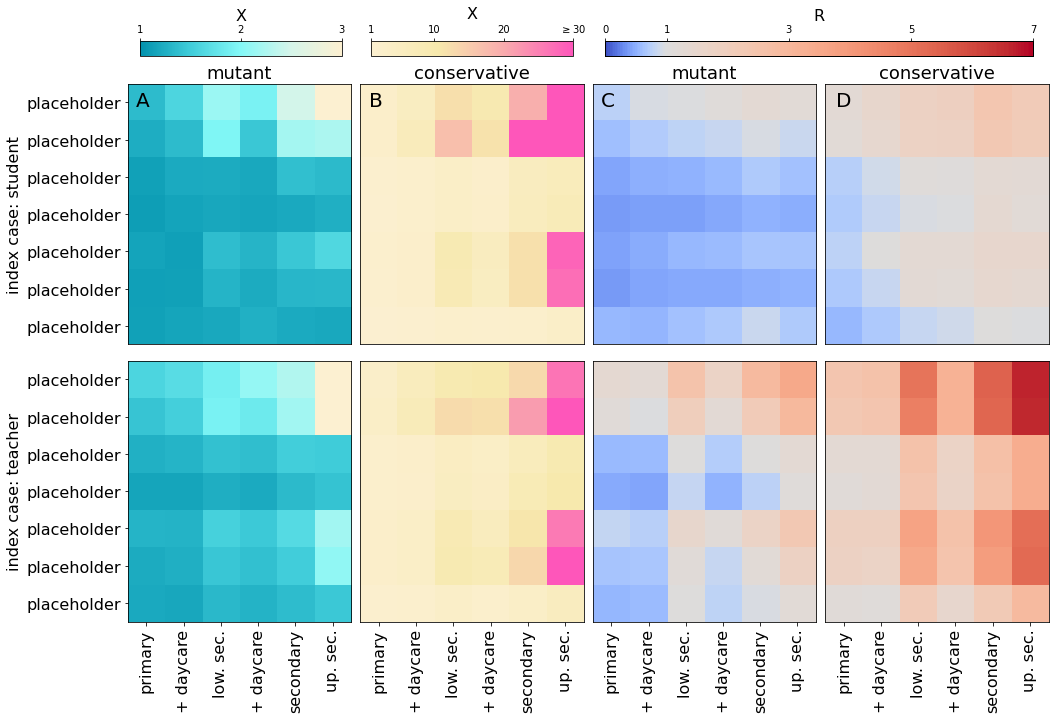

In [24]:
dst = '../../plots/sensitivity_analysis/'
fig, axes = plt.subplots(2, 4, figsize=(16.5, 10))

#measure_labels = [mc['label'] for mc in measure_combinations]
measure_labels = ['placeholder' for mc in measure_combinations]

for i, index_case in enumerate(['student', 'teacher']):
    for j, scenario in enumerate(['mutant', 'conservative']):
        
        # R0 plots
        student_R0 = colormaps[scenario]['R0']['student'] 
        teacher_R0 = colormaps[scenario]['R0']['teacher']
        tmp_R0 = {'student':student_R0, 'teacher':teacher_R0}
        
        ax = axes[i, j + 2]
        vmax = np.maximum(student_R0, teacher_R0).max()
        vmin = np.minimum(student_R0, teacher_R0).min()
        img = ax.imshow(tmp_R0[index_case], 
                        clim = (0, 7), 
                        norm = MidpointNormalize(midpoint=1, vmin=0, vmax=7), 
                        cmap=plt.get_cmap('coolwarm'))
        colormaps[scenario]['R0']['img'] = img
        
        if i == 1:
            ax.set_xticks(range(len(school_types)))
            ax.set_xticklabels(['primary', '+ daycare', 'low. sec.',
                        '+ daycare', 'secondary', 'up. sec.',], fontsize=16)
            ax.tick_params(axis='x', rotation=90)
            
        ax.set_yticks([])
        ax.set_yticklabels([])
        if i == 0:
            ax.set_title(scenario, fontsize=18)
        if i == 0:
            ax.set_xticklabels([])
            ax.set_xticks([])
            
        cbar_ax3 = fig.add_axes([0.527, 0.915, 0.36, 0.02])
        cbar3 = fig.colorbar(colormaps[scenario]['R0']['img'], cax=cbar_ax3,
                            orientation='horizontal', ticks=[0, 1, 3, 5, 7])
        cbar3.set_label('R', fontsize=16)
        cbar_ax3.xaxis.set_ticks_position('top')
        cbar_ax3.xaxis.set_label_position('top')
        
        # N-infected plots
        student = colormaps[scenario]['N_infected']['student'] /\
                  colormaps['baseline']['N_infected']['student']
        
        teacher = colormaps[scenario]['N_infected']['teacher'] /\
                  colormaps['baseline']['N_infected']['teacher']
        tmp_N_infected = {'student':student, 'teacher':teacher}
   
        ax = axes[i, j]
        vmax = np.maximum(student, teacher).max()
        #vmin = np.minimum(student, teacher).min()
        
        cmaps = {'conservative':get_continuous_cmap(hex_list2),
                 'mutant':get_continuous_cmap(hex_list1)}
        vmax = {'conservative':30,
                 'mutant':3}
        
        img = ax.imshow(tmp_N_infected[index_case], vmin=1, vmax=vmax[scenario], \
                        cmap=cmaps[scenario])
        
        colormaps[scenario]['N_infected']['img'] = img
        
        if j == 0:
            ax.set_yticks(range(len(measure_labels)))
            ax.set_yticklabels(measure_labels, fontsize=16)
            ax.set_ylabel('index case: {}'.format(index_case), fontsize=16)
        if j == 1:
            ax.set_yticks([])
            ax.set_yticklabels([])
        if i == 0:
            ax.set_title(scenario, fontsize=18)
        if i == 0:
            ax.set_xticklabels([])
            ax.set_xticks([])
        if i == 1:
            ax.set_xticks(range(len(school_types)))
            ax.set_xticklabels(['primary', '+ daycare', 'low. sec.',
                        '+ daycare', 'secondary', 'up. sec.',], fontsize=16)
            ax.tick_params(axis='x', rotation=90)

cbar_ax1 = fig.add_axes([0.33, 0.915, 0.17, 0.02])
cbar1 = fig.colorbar(colormaps['conservative']['N_infected']['img'],\
                    cax=cbar_ax1, orientation='horizontal', ticks=[1, 10, 20, 30])

cbar1.ax.set_xticklabels(['1', '10', '20', '$\\geq 30$']) 
cbar1.set_label('X', fontsize=16)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')


cbar_ax2 = fig.add_axes([0.135, 0.915, 0.17, 0.02])
cbar2 = fig.colorbar(colormaps['mutant']['N_infected']['img'],\
                    cax=cbar_ax2, orientation='horizontal', ticks=[1, 2, 3])
cbar2.set_label('X', fontsize=16)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')


plt.subplots_adjust(wspace=0.04, hspace=0.04)

fig.text(0.132, 0.845, 'A', fontsize=20)
fig.text(0.328, 0.845, 'B', fontsize=20)
fig.text(0.523, 0.845, 'C', fontsize=20)
fig.text(0.721, 0.845, 'D', fontsize=20)

plt.savefig(join(dst,'sensitivity_analysis_worst_case.svg'))
plt.savefig(join(dst,'sensitivity_analysis_worst_case.pdf'), bbox_extra_artists=[cbar1, cbar2, cbar3])